In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("carIn_test.csv")

In [4]:
print(df)

       Id  Age         Job  Marital  Education  Default  Balance  HHInsurance  \
0    4001   25      admin.   single  secondary        0        1            1   
1    4002   40  management  married   tertiary        0        0            1   
2    4003   44  management   single   tertiary        0    -1313            1   
3    4004   27    services   single  secondary        0     6279            1   
4    4005   53  technician  married  secondary        0     7984            1   
..    ...  ...         ...      ...        ...      ...      ...          ...   
995  4996   31      admin.   single  secondary        0      131            1   
996  4997   52  management  married   tertiary        0     2635            0   
997  4998   46  technician  married   tertiary        0     3009            0   
998  4999   60     retired  married  secondary        0     7038            0   
999  5000   28  management   single   tertiary        0      957            0   

     CarLoan Communication 

In [5]:
print(df.columns)

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')


In [6]:
print(df.dtypes)

Id                    int64
Age                   int64
Job                  object
Marital              object
Education            object
Default               int64
Balance               int64
HHInsurance           int64
CarLoan               int64
Communication        object
LastContactDay        int64
LastContactMonth     object
NoOfContacts          int64
DaysPassed            int64
PrevAttempts          int64
Outcome              object
CallStart            object
CallEnd              object
CarInsurance        float64
dtype: object


In [7]:
df1 = df[['HHInsurance', 'CarLoan']]

In [8]:
df1

,HHInsurance,CarLoan
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
995,1,0
996,0,0
997,0,0
998,0,0


In [9]:
from scipy.spatial import distance

In [10]:
from scipy.spatial.distance import cityblock

In [11]:
manhattandistance=distance.cityblock(df1['HHInsurance'].astype(float),df1['CarLoan'].astype(float))

In [12]:
df1

,HHInsurance,CarLoan
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
...,...,...
995,1,0
996,0,0
997,0,0
998,0,0


In [13]:
print(manhattandistance)

496.0


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
CosineSimilarity = cosine_similarity([df1.HHInsurance],[df1.CarLoan]) 

In [16]:
print(CosineSimilarity )

[[0.27694767]]


In [17]:
df2=pd.read_csv("car_sales.csv")

In [18]:
print(df2.head(5))

   Sales_in_thousands  Resale_value Vehicle_type  Price_in_thousands  \
0              16.919        16.360    Passenger               21.50   
1              39.384        19.875    Passenger               28.40   
2              14.114        18.225    Passenger                 NaN   
3               8.588        29.725    Passenger               42.00   
4              20.397        22.255    Passenger               23.99   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0           13.2             28.0          58.280150  
1           17.2             25.0         

In [19]:
print(df2.dtypes)

Sales_in_thousands    float64
Resale_value          float64
Vehicle_type           object
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Power_perf_factor     float64
dtype: object


In [20]:
print(df2.columns)

Index(['Sales_in_thousands', 'Resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')


In [21]:
df2 = df2[['Width', 'Length']]

In [22]:
df2

,Width,Length
0,67.3,172.4
1,70.3,192.9
2,70.6,192.0
3,71.4,196.6
4,68.2,178.0
...,...,...
152,67.6,176.6
153,69.3,185.9
154,69.3,186.2
155,71.5,185.7


In [23]:
import matplotlib.pyplot as plt

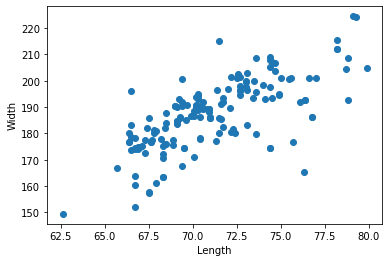

In [24]:
plt.scatter(df2.Width,df2.Length)
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

In [25]:
df3=df2.dropna()

In [26]:
import numpy as np

In [27]:
def pearson(x,y):
    correlation_matrix=np.corrcoef(x,y)
    return correlation_matrix[0,1]

In [28]:
r=pearson(df3.Length,df3.Width)

In [29]:
print(r)

0.710434890228813


In [35]:
a=np.cov(df3.Length,df3.Width)

In [36]:
print(a)

[[180.41202316  32.93909677]
 [ 32.93909677  11.91541935]]


In [37]:
print(a[0,1])

32.939096774193565


In [39]:
#For sparse datasets, We calculate similarity through angles. Here, Cosine similarity 0.27 - means it's not similar.
#Both variable have positive relationship.
#Both the variables are not very strongly corelated (0.71).